# Hielos Continentales

Siempre me llamó la atención la presencia de los Hielos Continentales Patagónicos.

Lo veo en dos tramos: entre 46$^\circ$ 30' -- 47$^\circ$ 30' incluyendo el monte San Valentín,
y entre 48$^\circ$ 20' y 51$^\circ$ 20' que incluye el monte Fitz roy y las Torres del Paine. 

Hay un tramo más de hielo al Sur de Tierra del Fuego, entre el Monte Sarmiento y el Darwin, 
al Oeste de Usuahia.

El propósito de este apunte es entender por qué los Hielos Continentales están donde están. 

* [Temperatura y Latitud](#Temperatura-y-Latitud)
* [Altura de congelamiento](#Altura-de-congelamiento)
* [Altura de la Cordillera](#Altura-de-la-Cordillera)
* [Circulación atmosférica](#Circulación-atmosférica)
* [Todo Junto](#Todo-Junto)


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


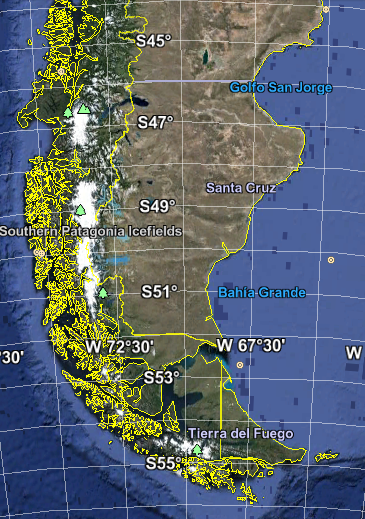

In [2]:
from IPython.core.display import Image 
from IPython.core.display import HTML 
Image(filename='Hielos.png')

## Temperatura y Latitud

En una [página sobre el calentamiento global](http://troyca.wordpress.com/2012/07/17/noaa-and-gfdl-cm2-1-sea-surface-temperature-trends-by-latitude/), encontré el gráfico de la temperatura del mar
promedio según la latitud (en el período 1982-2011).   
Me tomé el trabajo de digitalizar los datos, y el resultado está en la figura:

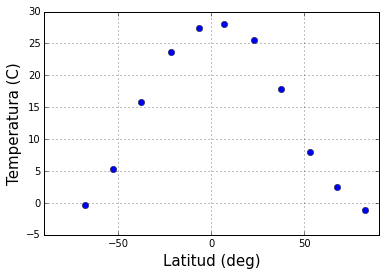

In [3]:
import csv
with open('T_Lat.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    Temp,Lat = [],[]
    for row in reader:
        Lat.append(float(row[0]))
        Temp.append(float(row[1]))
        
plot(Lat,Temp,'bo')
xlabel('Latitud (deg)',fontsize=15)
ylabel('Temperatura (C)',fontsize=15)
xlim(-90,90)
grid()


A esta curva se me ocurre hacerle un ajuste entera por algo tipo coseno (pero eso es curiosidad general),
y efectivamente anda con un cos$^2$. 

Entre -70 y -20 podemos ajustarla por una recta.

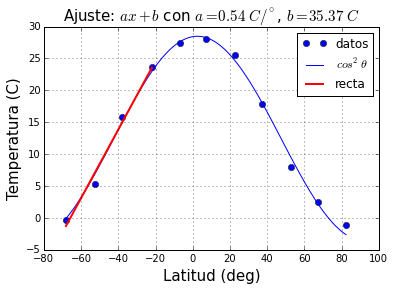

In [4]:
import numpy as np
from scipy.optimize import curve_fit

def func(x, a, b,c):
    '''Función a minimizar'''
    return a*np.cos((x+c)*3.14/180.)**2 + b

def lin (x,a,b):
    '''Función lineal de ajuste'''
    return a*x+b

Lat=array(Lat)
popt , pcov  = curve_fit(func, Lat, Temp)
popt2, pcov2 = curve_fit(lin, Lat[:4], Temp[:4])
Lat2 = linspace(Lat[0],Lat[-1],100)

plot(Lat,Temp,'bo',label='datos')
plot(Lat2   ,func(Lat2,popt[0],popt[1],popt[2]),label=r'$cos^2 \theta$')
plot(Lat[:4],lin(Lat[:4],popt2[0],popt2[1]),'r',lw=2,label='recta')

xlabel('Latitud (deg)',fontsize=15)
ylabel('Temperatura (C)',fontsize=15)

legend()
grid()
a,b = popt2
title(u'Ajuste: $ax+b$ con $a={:.2f}\ C/^\circ$, $b={:.2f}\ C$'.format(a,b), fontsize=15)
show()

## Altura de congelamiento

Existen modelos atmosféricos como el [ISA (International Standard Atmosphere)](http://en.wikipedia.org/wiki/International_Standard_Atmosphere). En la troposfera, debajo de los 11km, la temperatura decrece 
a razón de $6.5\ C/Km$.

La altura de congelamiento es la que la temperatura media es de cero grados. Si llamo $T_s$ a la temperatura superficial, 
según el ISA resulta: 

$$h_0 = \frac{T_s * 1000}{6.5} m$$

Y con el modelo lineal de la latitud, podemos graficar la recta resultante. 

Parece estar bien porque en Bariloche da una altura de $2100\ m$, y esa es la altura del hielo permanente. Además, cerca de 66 grados vale cero, que es justamente la latitud del círculo polar, donde hay hielos permanentes a nivel del mar.

A -40 grados de latitud, la altura de congelamiento es de 2135 m


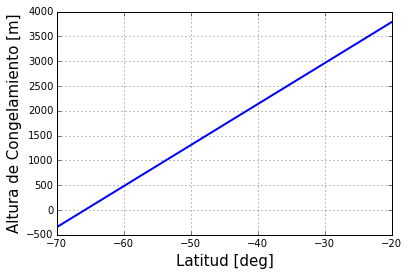

In [5]:
L = array([-70,-40,-20])
T = a*L+b
h0 = T*1000/6.5

xlim(-70,-20)
xlabel('Latitud [deg]',fontsize=15)
ylabel('Altura de Congelamiento [m]',fontsize=15)
plot (L,h0,lw=2)
grid()

print ( 'A {:.0f} grados de latitud, la altura de congelamiento es de {:.0f} m'.format(L[1],h0[1]))

## Altura de la Cordillera

El problema con eso es que hay que elegir la cordillera, que no es unidimensional.
La mejor elección no es el límite con Chile, sino las altas cumbres. 

El proceso es el siguiente: 

* Dibujo un path en el Google Earth y lo salvo como un KML
* Cargo el file en  http://www.gpsvisualizer.com/convert_input
* Elegir 'Plain output' y 'Best Available Model'
* Sale separado con tabs.

Con eso consigo un mapa de alturas y lo grafico. 
Hay una zonas que son más altas que la altura de cero grados y coincide bastante bien con los hielos continentales.

Al Norte, hasta los 35$^\circ$ (más o menos por Mendoza) la cordillera no se congela. 

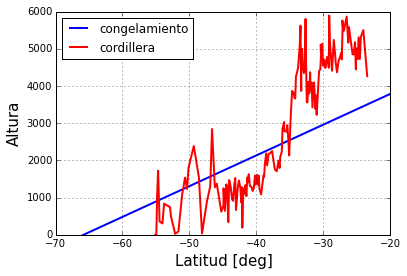

In [6]:
with open('Andes.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t', quotechar='|')
    Lat, H = [],[]
    for i,row in enumerate(reader):
        if i!=0:
            Lat.append(float(row[1]))
            H.append(float(row[3]))
Lat=array(Lat)
            
xlim(-70,-20)
ylim(0,6000)
xlabel('Latitud [deg]',fontsize=15)
ylabel('Altura',fontsize=15)
plot (L,h0,lw=2,label='congelamiento')
plot(Lat,H,'r',lw=2, label='cordillera')
grid()
legend(loc=2)
show()

## Circulación atmosférica

¿Por qué hay hielos en la cordillera Sur y entre Mendoza y Salta, que la temperatura es lo suficientemente baja
como para acumular hielo? 

Para entender eso, encontré lindos datos en [una página de un profesor de Física](http://www.roperld.com/science/PrecipLatitude_Longitude.htm) (David Roper) de Virginia.

Fíjense en estos gráficos:

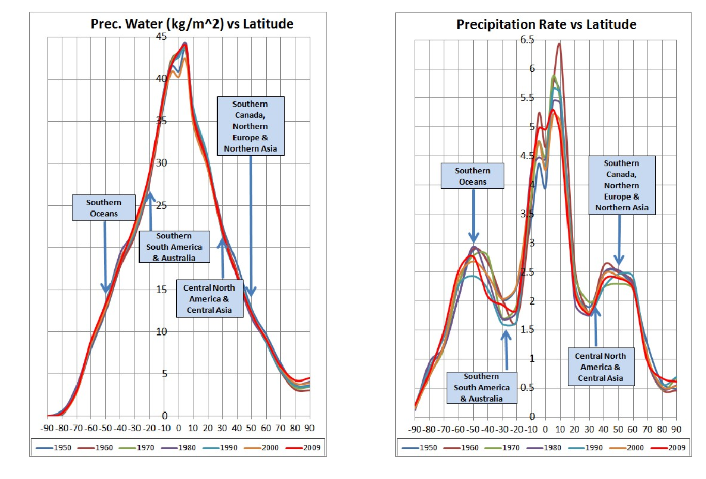

In [7]:
figure(figsize=(12,8))
ax1=subplot(121)
img=matplotlib.image.imread('PrecWaterVSLatitude.jpg')
plt.imshow(img)
plt.axis('off')
ax1=subplot(122)
img=matplotlib.image.imread('PrecipVSLatitude.jpg')
plt.imshow(img)
plt.axis('off')
show()

El primer gráfico indica la cantidad de agua precipitable en la atmósfera, pero que no cae en la misma proporción en todos lados, 
debido a la circulación atmosférica. 

El resultado es que cae el doble de agua alrededor de los 50$^\circ$ (que es la latitud de los hielos) que en la región  
entre 20$^\circ$ y 30$^\circ$. Esto explica el detalle que faltaba: en Mendoza no hay un campo de hielo porque es muy seco.

Esto se debe a la _circulación atmosférica_. El efecto se entiende pensando que en el ecuador tenemos la mayor energía incidente sobre la superficie. Eso calienta el aire adyacente y genera una granja de baja presión en el ecuador. 

Ese aire vuelve a bajar aproximadamente a los $30^\circ$ de latitud, generando una franja de altas presiones, secas y de cielos despejados. 

El mecanismo se repite, formando dos celdas más hasta llegar al polo.

Los vientos se curvan en el camino de una a otra región, debido a la fuerza de Coriolis.   
Un dibujito con la circulación atmosférica, para que se entienda el efecto:

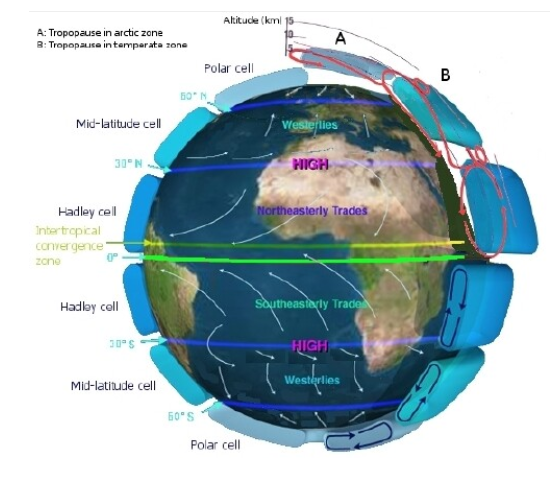

In [8]:
img=matplotlib.image.imread('AtmosphericCirculation.jpg')
figure(figsize=(10,8))
plt.imshow(img)
plt.axis('off')
show()

Además, como la circulación limpia el aire en los $30^\circ$, es el lugar ideal para colocar un observatorio, alto, seco y limpio.  
En el mapa se ve la ubicación de los telescopios ópticos grandes del hemisferio Sur. Están todos en esa franja ! Da la impresión de que entendimos algo.

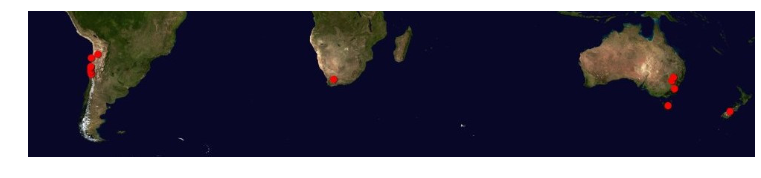

In [9]:
img=matplotlib.image.imread('80_obs.jpg')
figure(figsize=(13,8))
plt.imshow(img)
plt.axis('off')
show()

## Todo Junto

Para graficar todo junto, tengo que:

* Digitalizar el gráfico de precipitaciones
* Poner un mapa abajo, como referencia

In [10]:
## Digitalización del gráfico
with open('PrecipVSLatitude.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    Lat_1, Prep = [],[]
    for i,row in enumerate(reader):
        if i!=0:
            Lat_1.append(float(row[0]))
            Prep.append(float(row[1]))

# Funciones a dibujar    
from scipy.interpolate import interp1d
#    Precip
Precip = interp1d(Lat_1, Prep, kind='cubic')
#    Andes (Lat,H)
#    H0
H0 = lambda L: (a*L+b)*1000/6.5

Colocar un mapa como referencia es bastante pesado.  
Los gráficos los tengo en función de la Latitud, de manera que sería útil tener los mapas en proyección Mercator, donde los paralelos y meridianos son rectas perpendiculares.

Eso lo encontré en la web, pero los paralelos no están equiespaciados.  
Deformar la imagen es mucho trabajo, así que mejor deformo los gráficos con las funciones 
`pixel->Latitud` (`p2L`) y su inversa (`L2p`).

In [11]:
# Conversion
pix=array([544, 424, 283,118])
LL =[-20,-30,-40,-50]
qad = lambda x,a,b,c: a*x**2+b*x+c

popt, pcov = curve_fit(qad, pix, LL)
p2L = lambda x: qad(x,popt[0],popt[1],popt[2])
L2p = lambda x: (-popt[1]+sqrt(popt[1]**2-4.*popt[0]*(popt[2]-x))) / (2.*popt[0])

pp=linspace(100,550,100)

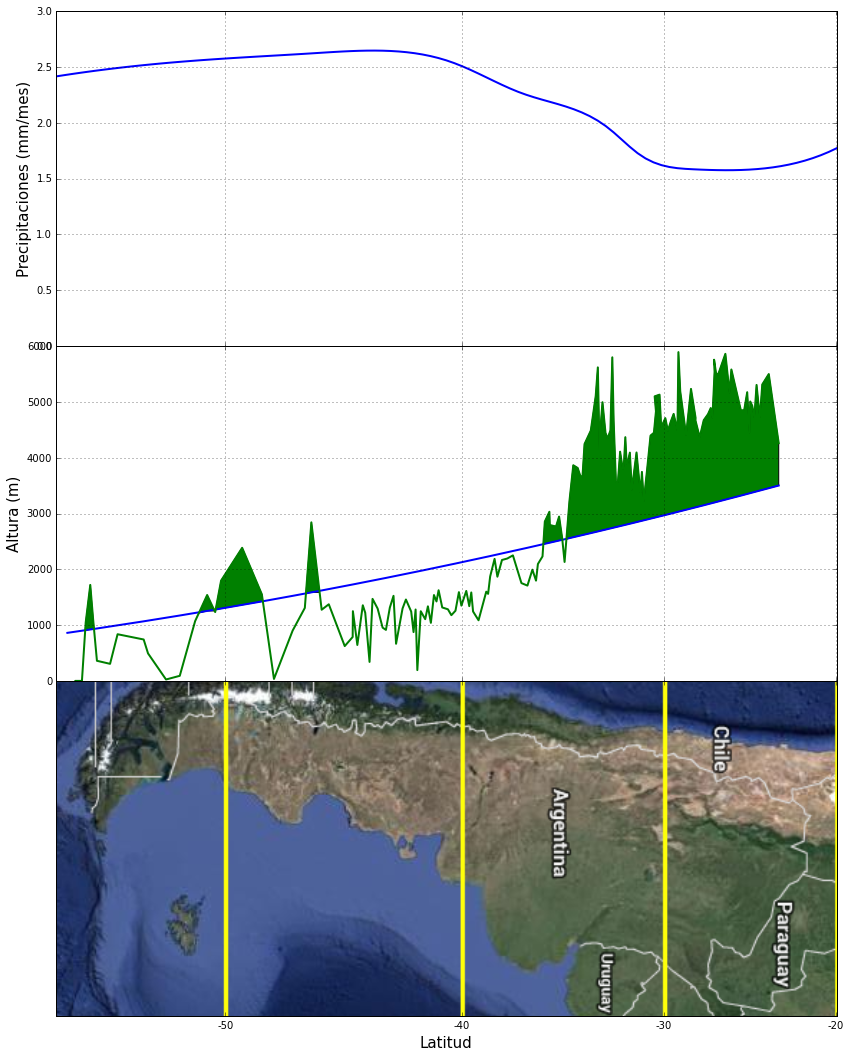

In [12]:
# Grafico
fig=figure(figsize=(14,18))
fig.subplots_adjust(hspace=0.001)
img=matplotlib.image.imread('andesM.png')

ppx=linspace(0,550,100)

ax1=subplot(311)
ax1.plot(ppx,Precip(p2L(ppx)),lw=2)
ylabel('Precipitaciones (mm/mes)',fontsize=15)
setp(ax1.get_xticklabels(), visible=False)
grid()
ylim(0,3)

ax2=subplot(312,sharex=ax1)
ylabel('Altura (m)',fontsize=15)
setp(ax2.get_xticklabels(), visible=False)
ax2.plot(L2p(Lat),H0(Lat) ,lw=2)
ax2.plot(L2p(Lat),H,lw=2)
ax2.fill_between(L2p(Lat), H0(Lat), H, where=H>=H0(Lat), facecolor='green', interpolate=True)
grid()
ylim(0,6000)

ax3=subplot(313,sharex=ax1)
ax3.imshow(img)
ax3.set_yticks([])
ax3.set_xticks(pix)
ax3.set_xticklabels(LL)
xlabel('Latitud',fontsize=15)
show()

Da muy lindo. Creo que en el Sur está un poquito corrido debido a que hay que mejorar la calibración del mapa.

-------------------------------------------------------------

A modo de regalo final, va una foto muy linda de la tierra en la que se ve la cobertura de nubes. La foto es de la NASA y está tomada de la Wikipedia.

In [13]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/9/9d/MODIS_Map.jpg')